In [1]:
# ============================================================================
# CASE STUDY 1: HOUSE PRICE PREDICTION - TENSORFLOW/KERAS
# ============================================================================

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("house_prices_dataset.csv")
df.head()

,square_feet,bedrooms,bathrooms,age_years,location,condition,has_garage,lot_size,stories,year_built,price
0,3974,1,1.5,31,Urban,Fair,1,7077,1,1993,811771.790937
1,1660,5,4.0,10,Rural,Good,0,9998,1,2014,677593.566492
2,2094,4,2.5,21,Suburbs,Excellent,0,5768,1,2003,667440.207159
3,1930,2,1.0,21,Waterfront,Excellent,1,2950,1,2003,634143.150429
4,1895,1,2.0,42,Rural,Fair,0,9995,1,1982,430056.475842


In [6]:

print(f"Dataset shape: {house_df.shape}")
print(f"\nFirst 5 rows:")
print(house_df.head())
print(f"\nDataset statistics:")
print(house_df.describe())

Dataset shape: (1000, 11)

First 5 rows:
   square_feet  bedrooms  bathrooms  age_years    location  condition  \
0         3974         1        1.5         31       Urban       Fair   
1         1660         5        4.0         10       Rural       Good   
2         2094         4        2.5         21     Suburbs  Excellent   
3         1930         2        1.0         21  Waterfront  Excellent   
4         1895         1        2.0         42       Rural       Fair   

   has_garage  lot_size  stories  year_built          price  
0           1      7077        1        1993  811771.790937  
1           0      9998        1        2014  677593.566492  
2           0      5768        1        2003  667440.207159  
3           1      2950        1        2003  634143.150429  
4           0      9995        1        1982  430056.475842  

Dataset statistics:
       square_feet     bedrooms    bathrooms    age_years   has_garage  \
count  1000.000000  1000.000000  1000.000000  1000.00

In [9]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price'].values
    
 # Encode categorical variables
label_encoders = {}
categorical_cols = ['location', 'condition']
    
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    
# Convert to numpy array
X = X.values.astype(np.float32)
y = y.astype(np.float32)
    
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
X_train.shape, X_test.shape

((800, 10), (200, 10))

In [12]:
y_train = y_train / 1_000_000
y_test = y_test / 1_000_000

In [14]:
input_dim = 10
model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', name='hidden1'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', name='hidden2'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu', name='hidden3'),
        layers.Dense(1, name='output')  # Linear activation for regression
    ])

In [15]:
model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-6
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1330 - mae: 0.2956 - val_loss: 0.0279 - val_mae: 0.1298 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0691 - mae: 0.2091 - val_loss: 0.0328 - val_mae: 0.1529 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0521 - mae: 0.1854 - val_loss: 0.0184 - val_mae: 0.1101 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0416 - mae: 0.1625 - val_loss: 0.0196 - val_mae: 0.1144 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0384 - mae: 0.1575 - val_loss: 0.0183 - val_mae: 0.1103 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - mae: 0.1356 - val_loss: 0.0154 - val_mae: 0.1009 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mae: 0.1278 - val_loss: 0.0165 - val_mae: 0.1061 - learning_rate: 0.0010
Epoch 8/100


In [20]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\n Test MAE: ${test_mae * 1_000_000:,.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mae: 0.0374 

 Test MAE: $37,403.78


In [21]:
# -----------------------------------------------------------------------------
# PREDICTIONS
# -----------------------------------------------------------------------------

# Make predictions
y_pred = model.predict(X_test)

# Convert back to actual prices
y_test_actual = y_test * 1_000_000
y_pred_actual = y_pred.flatten() * 1_000_000

# Show sample predictions
print("\n📊 Sample Predictions:")
for i in range(5):
    print(f"Actual: ${y_test_actual[i]:,.2f} | Predicted: ${y_pred_actual[i]:,.2f} | Error: ${abs(y_test_actual[i] - y_pred_actual[i]):,.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

📊 Sample Predictions:
Actual: $703,131.88 | Predicted: $717,985.25 | Error: $14,853.38
Actual: $740,856.44 | Predicted: $769,854.69 | Error: $28,998.25
Actual: $680,697.38 | Predicted: $638,210.44 | Error: $42,486.94
Actual: $1,008,047.00 | Predicted: $914,356.69 | Error: $93,690.31
Actual: $1,029,212.38 | Predicted: $1,026,498.69 | Error: $2,713.69


 Training plots saved to 'house_price_training_history.png'


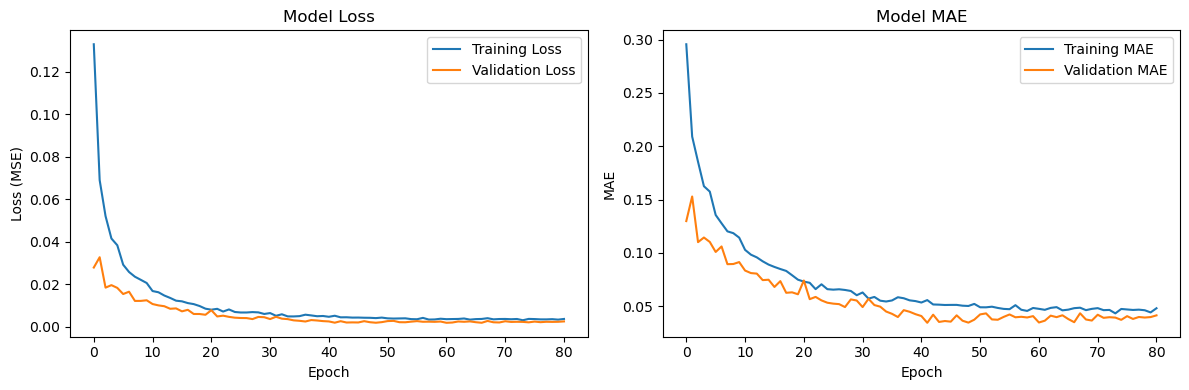

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Model MAE')

plt.tight_layout()
plt.savefig('house_price_training_history.png')
print(" Training plots saved to 'house_price_training_history.png'")

